# Практична робота 10
## Авдєєва Серафима ФІТ 4-4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [2]:
# Завантаження та розділення датасету
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print("x_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)

170498071/170498071 [==============================] - 4s 0us/step
x_train original shape (50000, 32, 32, 3)
y_train original shape (50000, 1)


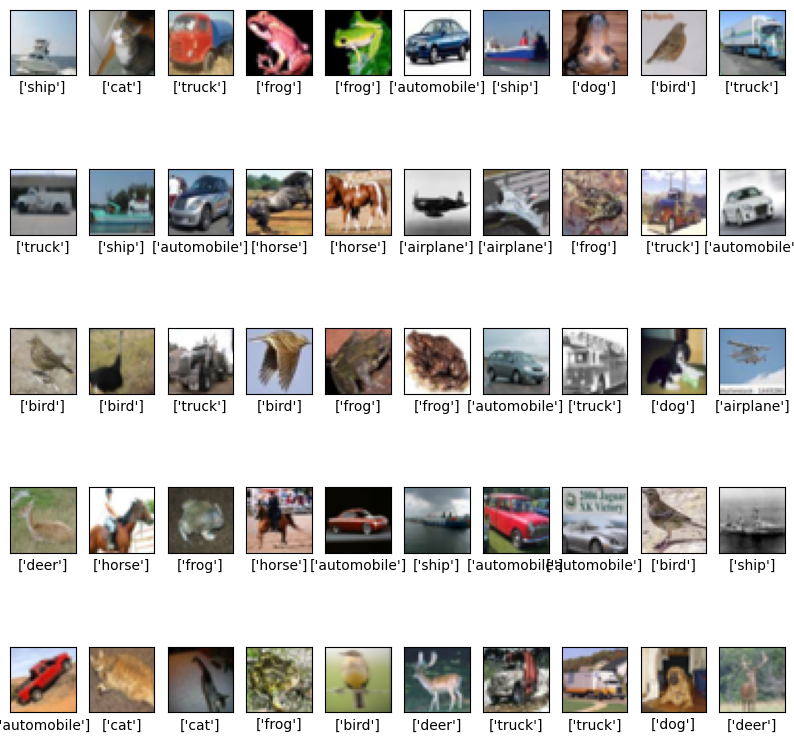

In [3]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(np.array(classes)[y_train[i]])

In [4]:
# Нормалізація даних
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Перетворення міток в категоріальні дані
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
# Будівництво моделі
model = keras.Sequential([
    layers.Flatten( input_shape=(32,32,3)),  # Плоский шар для згладжування зображення
    layers.Dense(128, activation="relu"),   # Повністю з'єднаний шар з 128 вузлами
    layers.Dense(64, activation="relu"),    # Повністю з'єднаний шар з 64 вузлами
    layers.Dense(32, activation="relu"),    # Повністю з'єднаний шар з 32 вузлами
    layers.Dense(10, activation="softmax")  # Вихідний шар з 10 вузлами та функцією активації softmax
])

# Компіляція моделі
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Виведення інформації про модель
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 404010 (1.54 MB)
Trainable params: 404010 (1.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Тренування моделі
history = model.fit(x_train,
                    y_train, epochs=15,
                    batch_size=64, validation_split=0.2)

Epoch 1/15
625/625 [==============================] - 8s 12ms/step - loss: 1.9263 - accuracy: 0.2969 - val_loss: 1.8260 - val_accuracy: 0.3422
Epoch 2/15
625/625 [==============================] - 6s 9ms/step - loss: 1.7339 - accuracy: 0.3757 - val_loss: 1.7188 - val_accuracy: 0.3842
Epoch 3/15
625/625 [==============================] - 7s 11ms/step - loss: 1.6505 - accuracy: 0.4121 - val_loss: 1.6747 - val_accuracy: 0.4013
Epoch 4/15
625/625 [==============================] - 5s 9ms/step - loss: 1.5995 - accuracy: 0.4295 - val_loss: 1.6472 - val_accuracy: 0.4124
Epoch 5/15
625/625 [==============================] - 6s 10ms/step - loss: 1.5571 - accuracy: 0.4457 - val_loss: 1.6131 - val_accuracy: 0.4345
Epoch 6/15
625/625 [==============================] - 6s 10ms/step - loss: 1.5280 - accuracy: 0.4559 - val_loss: 1.5899 - val_accuracy: 0.4361
Epoch 7/15
625/625 [==============================] - 6s 9ms/step - loss: 1.4987 - accuracy: 0.4649 - val_loss: 1.5659 - val_accuracy: 0.4422
Ep

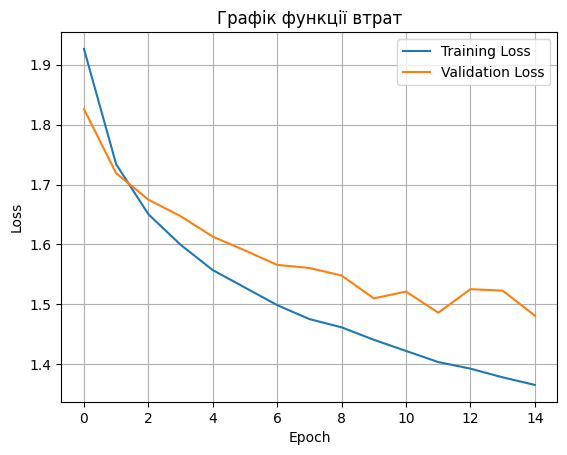

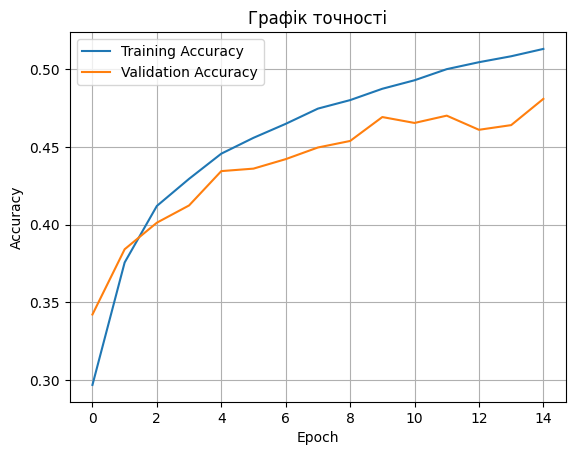

In [7]:
# Виведення графіків функції втрат та точності
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Графік функції втрат")
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Графік точності")
plt.grid()
plt.legend()
plt.show()


313/313 - 1s - loss: 1.4503 - accuracy: 0.4891 - 674ms/epoch - 2ms/step

Test Accuracy: 48.91%
1/1 [==============================] - 0s 21ms/step
Image 1: Predicted Class 8, True Class 8
Image 2: Predicted Class 1, True Class 1
Image 3: Predicted Class 0, True Class 3
Image 4: Predicted Class 6, True Class 2
Image 5: Predicted Class 7, True Class 7
Image 6: Predicted Class 6, True Class 3
Image 7: Predicted Class 6, True Class 6
Image 8: Predicted Class 6, True Class 2
Image 9: Predicted Class 3, True Class 2
Image 10: Predicted Class 2, True Class 2


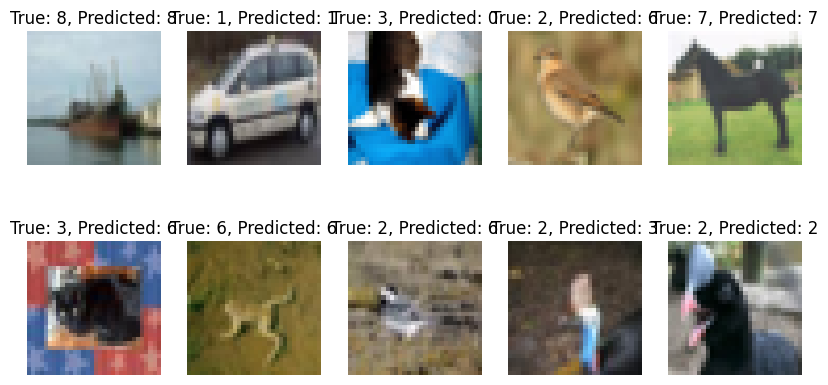

In [11]:
# Оцінка точності на тестовому наборі
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_accuracy*100:.2f}%")

# Розпізнавання 10 випадкових зображень
random_indices = np.random.choice(x_test.shape[0], 10, replace=False)
random_images = x_test[random_indices]
predictions = model.predict(random_images)

# Виведення результатів розпізнавання
for i in range(10):
    predicted_class = np.argmax(predictions[i])
    true_class = np.argmax(y_test[random_indices[i]])
    print(f"Image {i + 1}: Predicted Class {predicted_class}, True Class {true_class}")

# Виведення зображень для перевірки
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(random_images[i], cmap='gray')
    plt.title(f"True: {np.argmax(y_test[random_indices[i]])}, Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()

In [12]:
# Виведення статистики моделі
print("\nModel Evaluation:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Статистика параметрів моделі
total_parameters = sum([np.prod(layer.get_weights()[i].shape) for layer in model.layers for i in range(len(layer.get_weights()))])

print(f"\nTotal Parameters: {total_parameters}")

# Статистика шарів моделі
for i, layer in enumerate(model.layers):
    print(f"\nLayer {i + 1}: {layer.name}")
    print(f"Number of Parameters: {layer.count_params()}")
    print(f"Input Shape: {layer.input_shape}, Output Shape: {layer.output_shape}")


Model Evaluation:
Test Loss: 1.4503
Test Accuracy: 48.91%

Total Parameters: 404010

Layer 1: flatten
Number of Parameters: 0
Input Shape: (None, 32, 32, 3), Output Shape: (None, 3072)

Layer 2: dense
Number of Parameters: 393344
Input Shape: (None, 3072), Output Shape: (None, 128)

Layer 3: dense_1
Number of Parameters: 8256
Input Shape: (None, 128), Output Shape: (None, 64)

Layer 4: dense_2
Number of Parameters: 2080
Input Shape: (None, 64), Output Shape: (None, 32)

Layer 5: dense_3
Number of Parameters: 330
Input Shape: (None, 32), Output Shape: (None, 10)


# Висновок

У ході цієї роботи була розроблена та навчена нейронна мережа для класифікації зображень з датасету CIFAR-10.

Під час підготовки даних датасет було завантажено та розділено на тренувальний і тестовий набори. Дані були нормалізовані для швидшого та ефективнішого тренування мережі.

Мережа була побудована з використанням бібліотеки Keras, з чотирма повністю з'єднаними шарами без використання згорткових шарів та підходящими функціями активації.

Під час тренування було визначено оптимальну кількість епох, уникнуто перенавчання, та виведено графіки функції втрат та точності для оцінки процесу тренування.

Модель була оцінена на тестовому наборі. Також було вибрано 10 випадкових зображень з тестового набору, класифіковано їх за допомогою навченої моделі та порівняно зі справжніми класами.

Була виведена статистика моделі для отримання докладної інформації про її параметри та розмір.

Отримана модель демонструє задовільні результати на тестовому наборі, але можливі шляхи поліпшення включають удосконалення архітектури мережі, оптимізацію гіперпараметрів та розширення тренувального набору для зменшення ризику перенавчання.